In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math


Module 1: Data Collection

In [3]:
data=pd.read_csv("C:/Users/autad/Downloads/FWI Dataset.csv")
print(data.head())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [5]:
print(data.describe())

              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.175318   14.204824  
min      0.000000   28.60

In [6]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [7]:
#shape
data.shape

(244, 15)

Module 2: Data Exploration and Data Preprocessing

In [8]:
# Handling Missing Values

data['DC'] = data['DC'].astype(str).str.replace(' ', '', regex=False)
data['FWI'] = data['FWI'].astype(str).str.replace(' ', '', regex=False)


data['DC'] = pd.to_numeric(data['DC'], errors='coerce')
data['FWI'] = pd.to_numeric(data['FWI'], errors='coerce')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [10]:
# Identify rows with missing values
null_rows = data[data.isnull().any(axis=1)]
print("Rows with missing values:\n", null_rows)

Rows with missing values:
      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC     DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.69  12.5   

      BUI  FWI Classes            Region  
165  10.4  NaN       NaN  Sidi-Bel Abbes  


In [11]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [12]:
# Fill missing values using mode
for col in data.columns:
    data.loc[:, col] = data[col].fillna(data[col].mode()[0])

# Drop remaining missing values
data.dropna(inplace=True)

data.isnull().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
# drop unnecessary columns
data.drop(columns=[col for col in data.columns if "Unnamed" in col], inplace=True)

data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


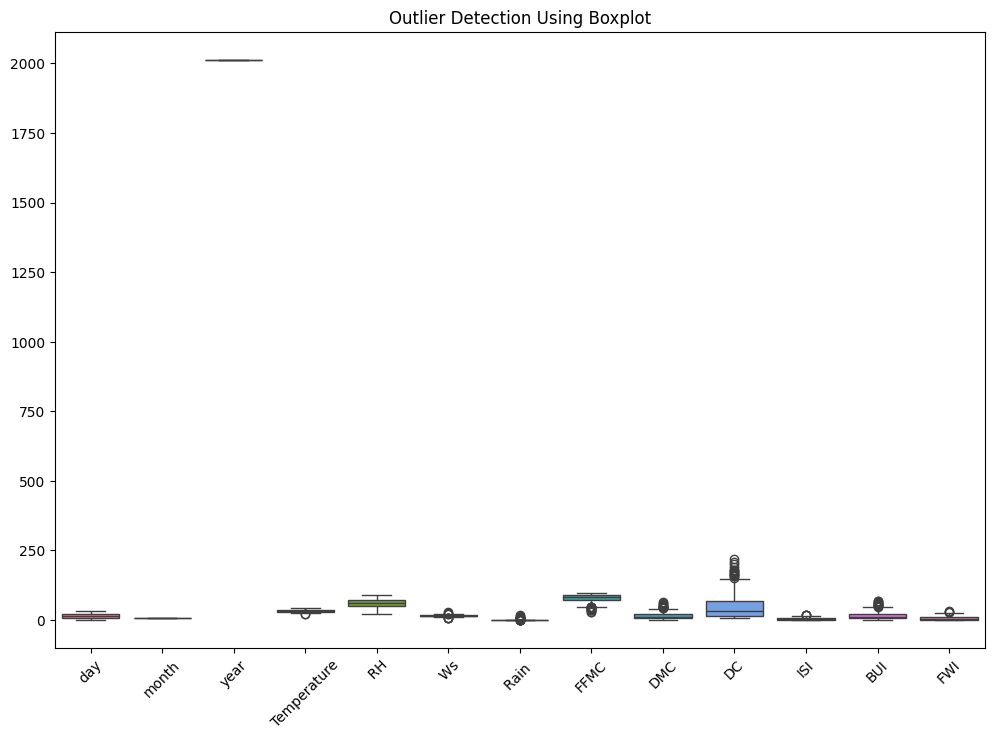

In [14]:
# Outlier Detection Using Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplot")
plt.show()



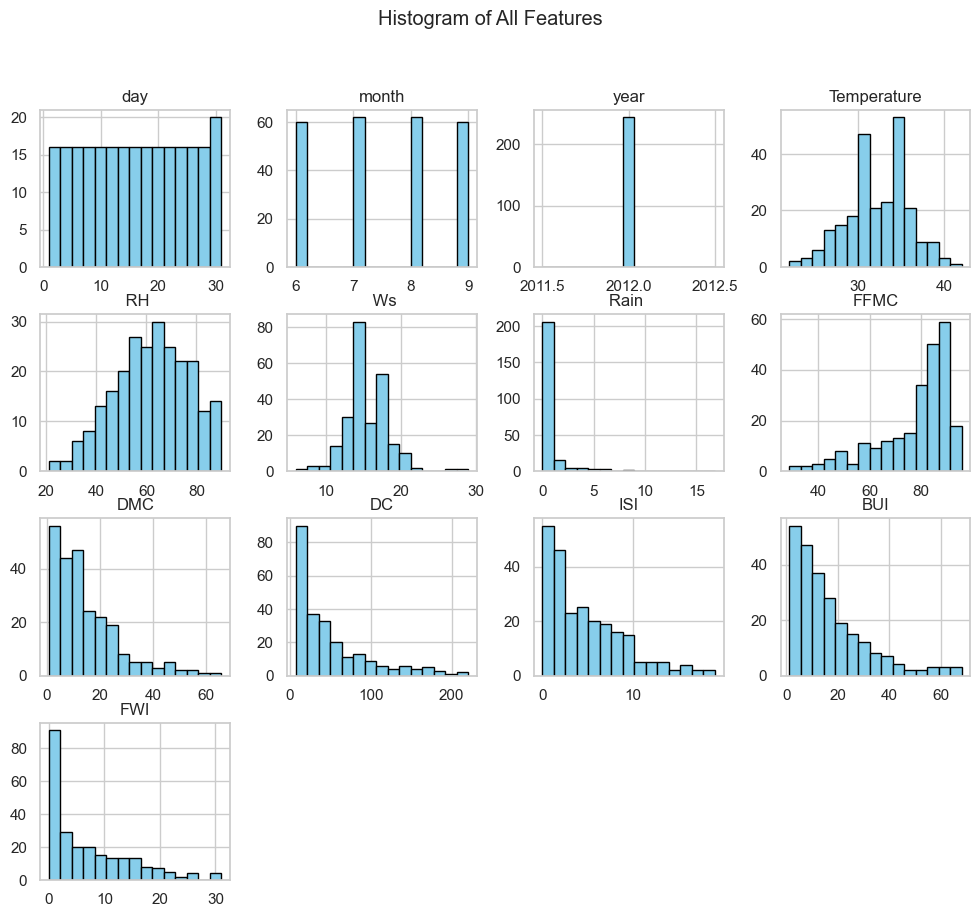

In [27]:
# Histograms for All Features
data.hist(figsize=(12, 10), bins=15,color='skyblue', edgecolor='black')
plt.suptitle("Histogram of All Features")
plt.show()


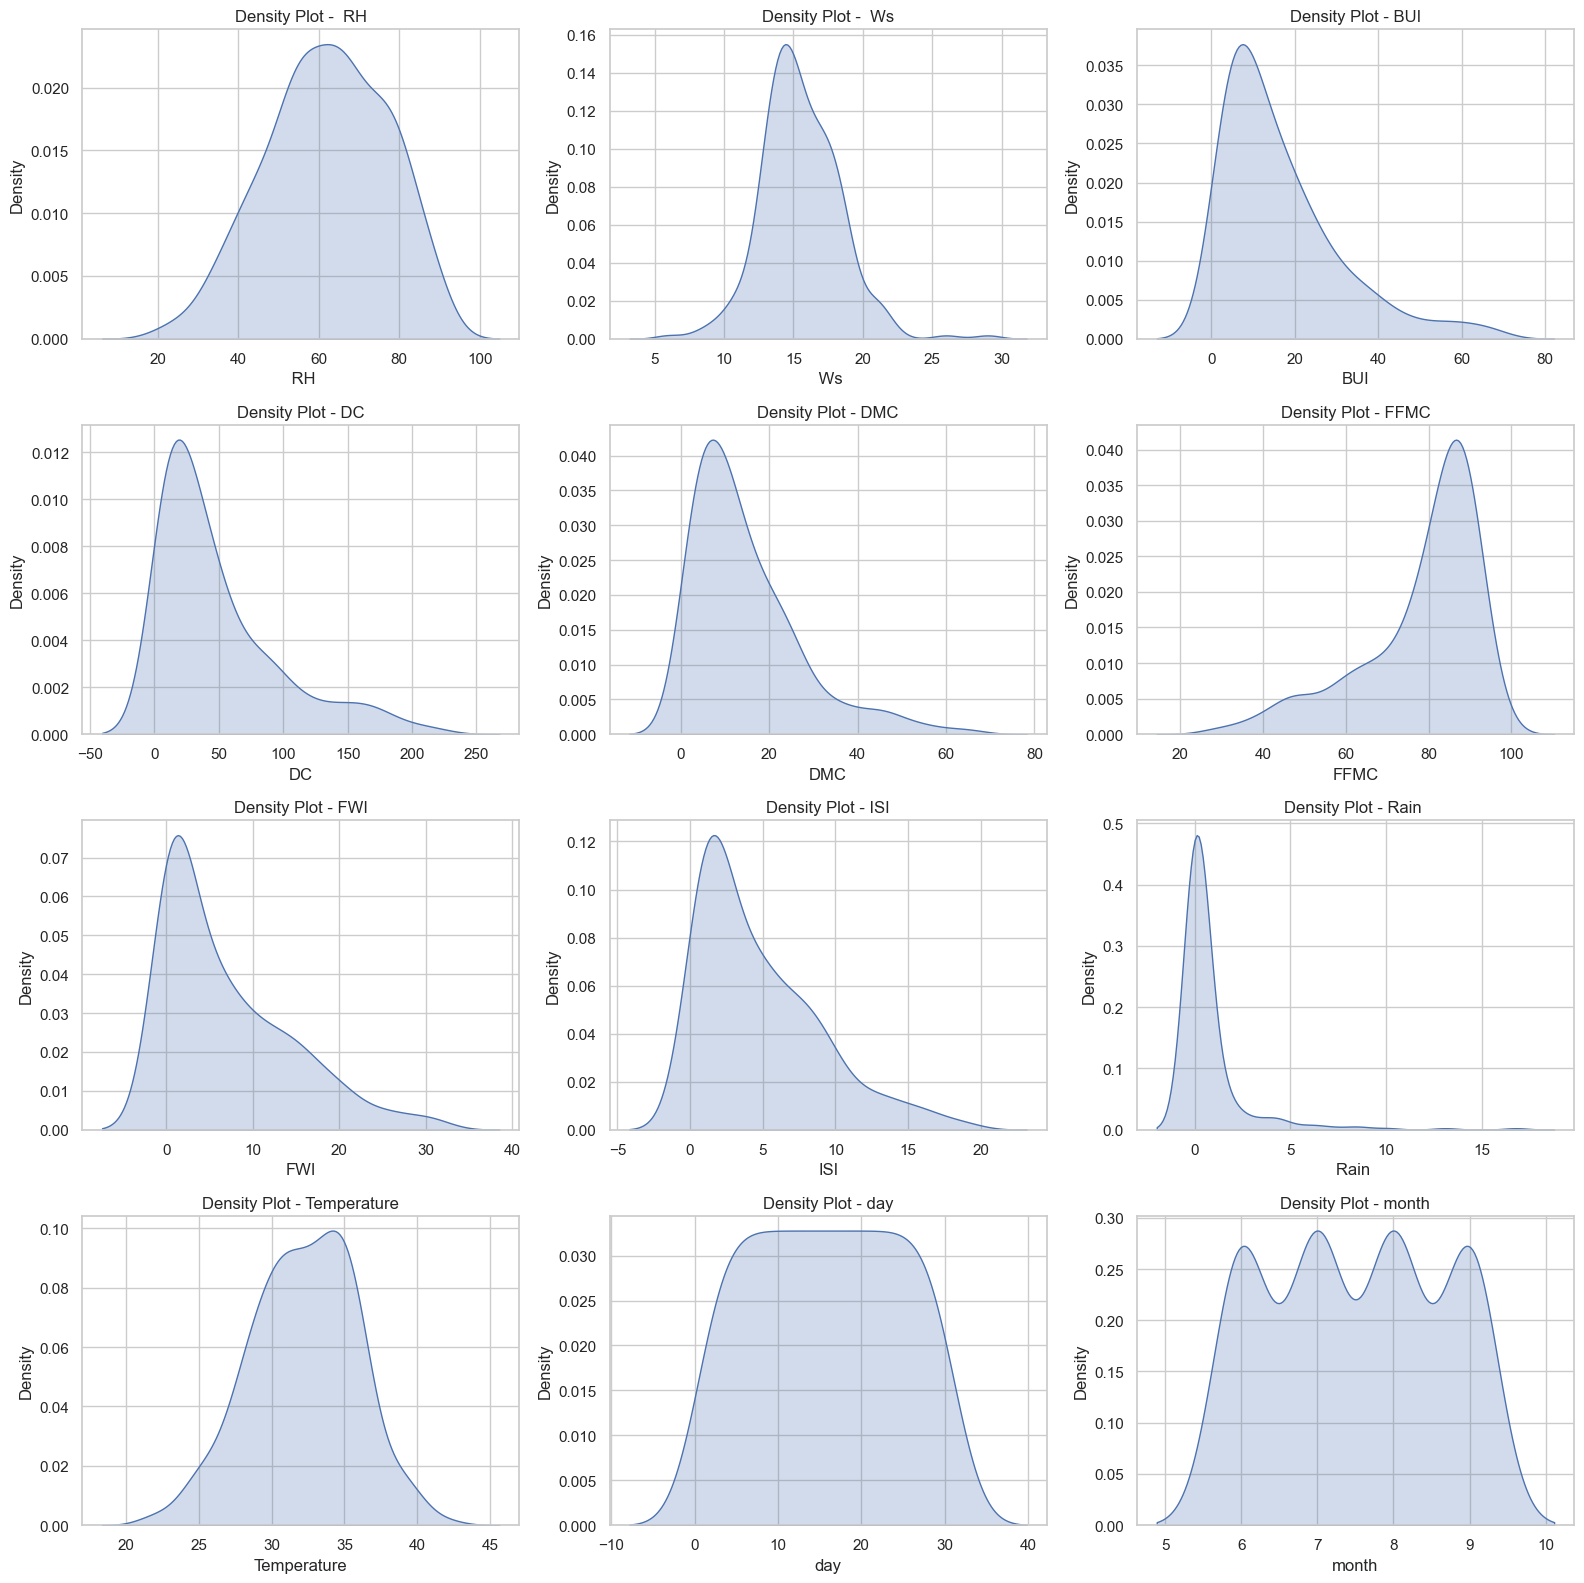

In [39]:
# density plots for numerical features
 
# Select numerical columns
num_cols = sorted([col for col in data.columns if data[col].dtype != "object"])

valid_cols = []

# Filter out columns with zero variance
for col in num_cols:
    if data[col].nunique() > 1:   
        valid_cols.append(col)

cols = 3
rows = math.ceil(len(valid_cols) / cols)

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(valid_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data[col], fill=True)
    plt.title(f"Density Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


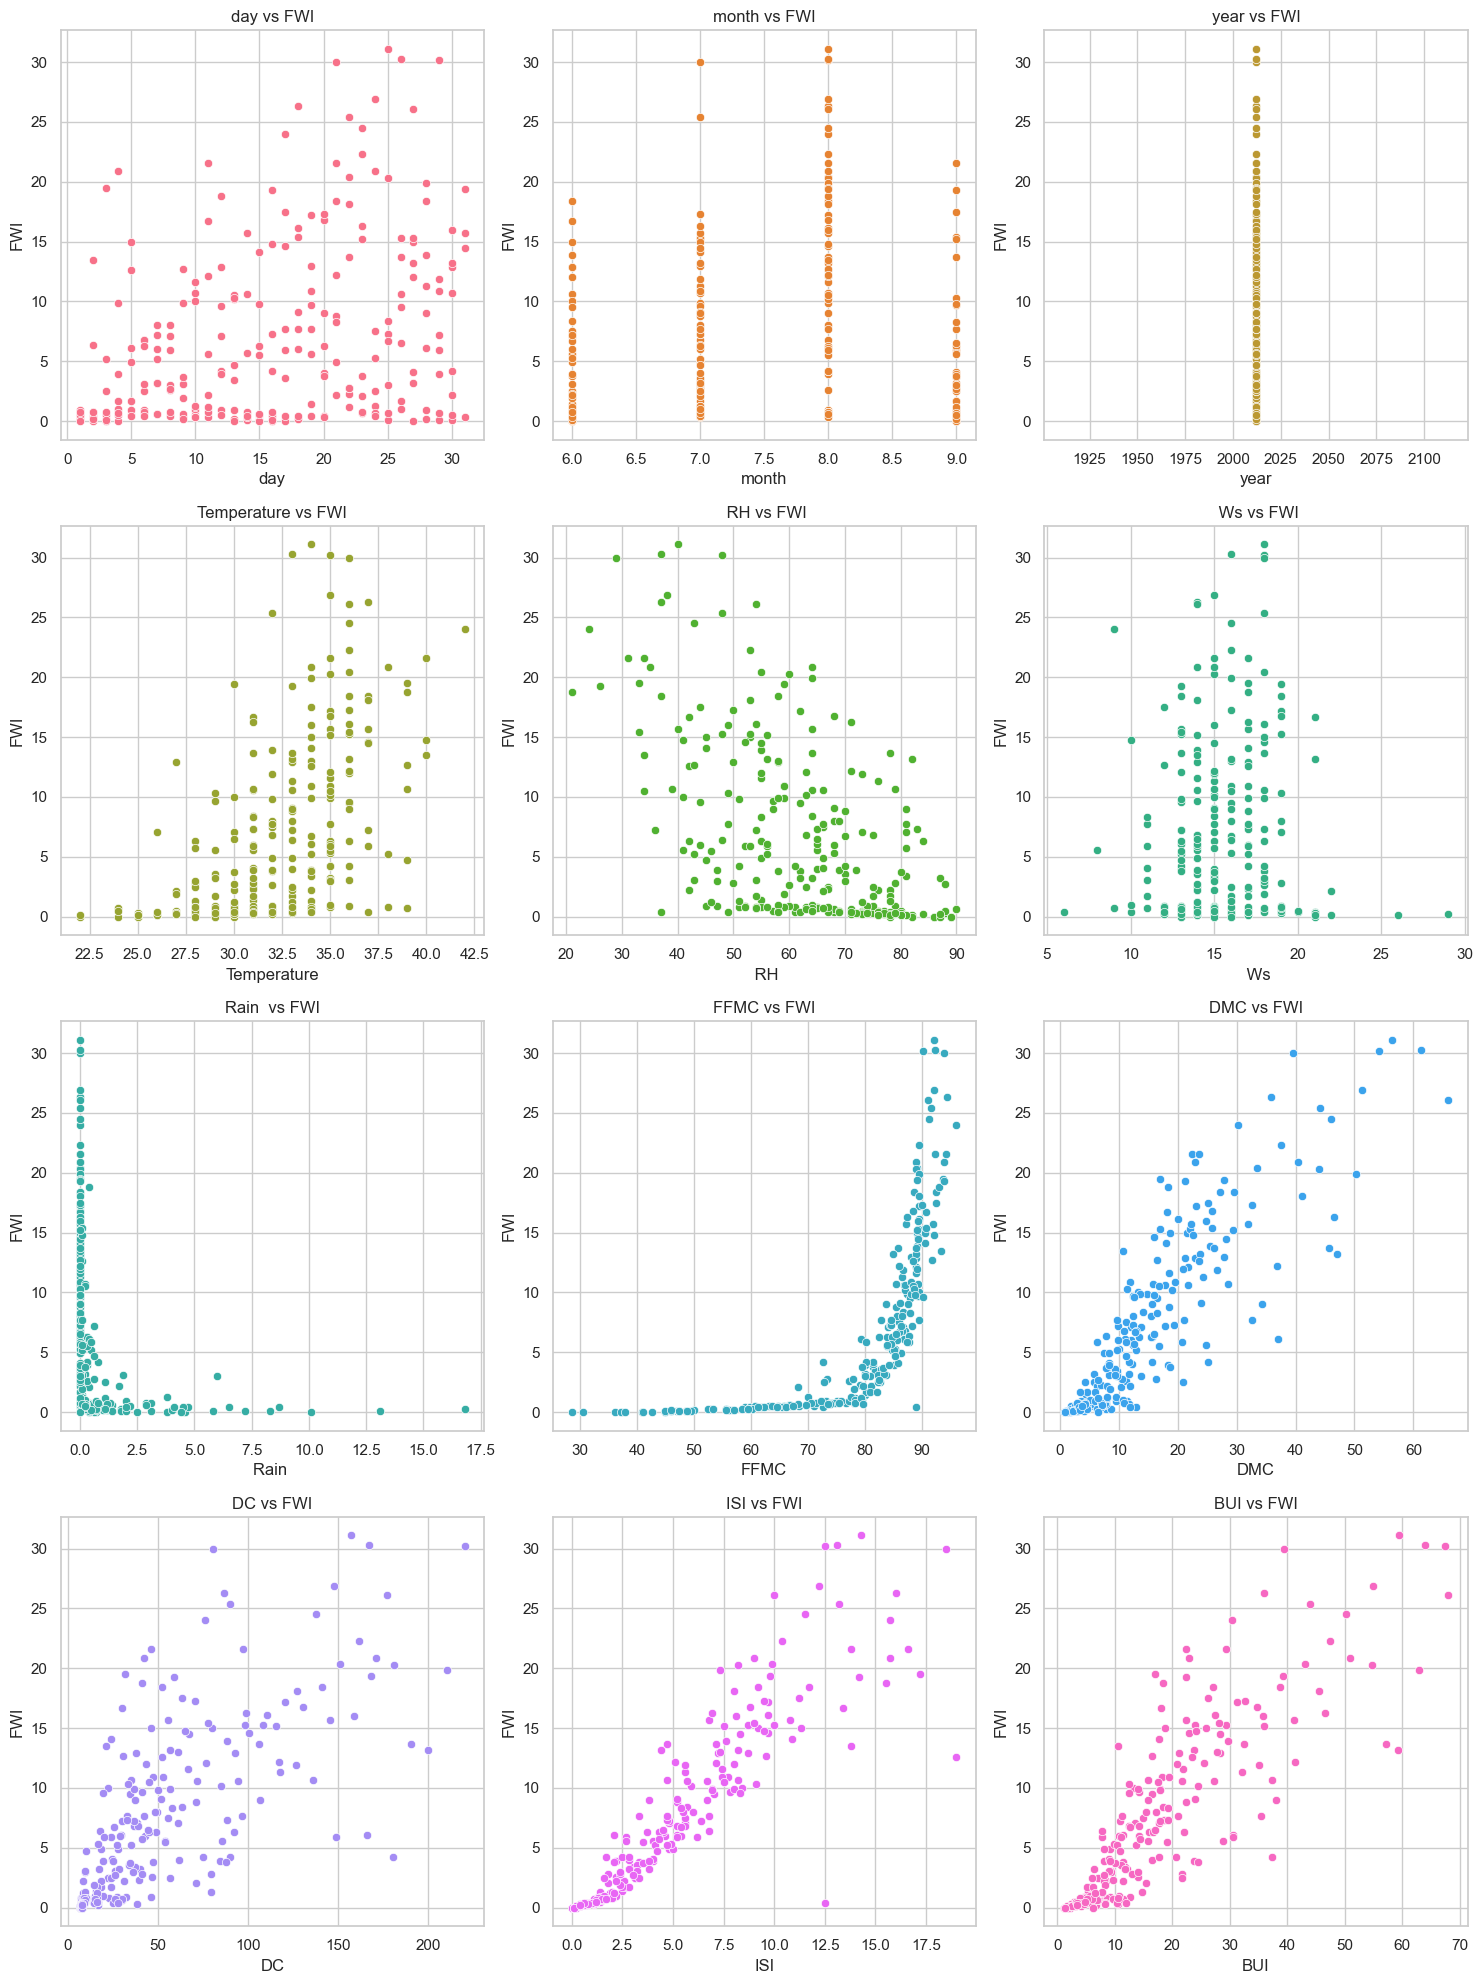

In [ ]:
# Scatter Plots of Numerical Features vs FWI

num_cols = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != "FWI"]

palette = sns.color_palette("husl", len(num_cols))  # colorful palette
cols = 3
rows = math.ceil(len(num_cols) / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=data[col], y=data["FWI"], color=palette[i-1])
    plt.xlabel(col)
    plt.ylabel("FWI")
    plt.title(f"{col} vs FWI")

plt.tight_layout()
plt.show()


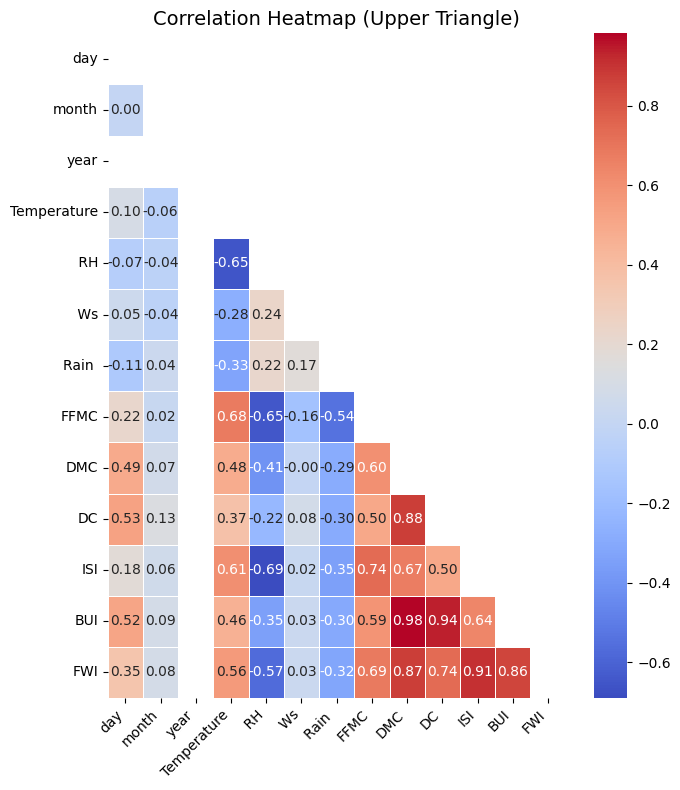

In [15]:
plt.figure(figsize=(7, 8))
corr = data.select_dtypes(include=['float64','int64']).corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    mask=mask,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.title("Correlation Heatmap (Upper Triangle)", fontsize=14)
plt.tight_layout()
plt.show()


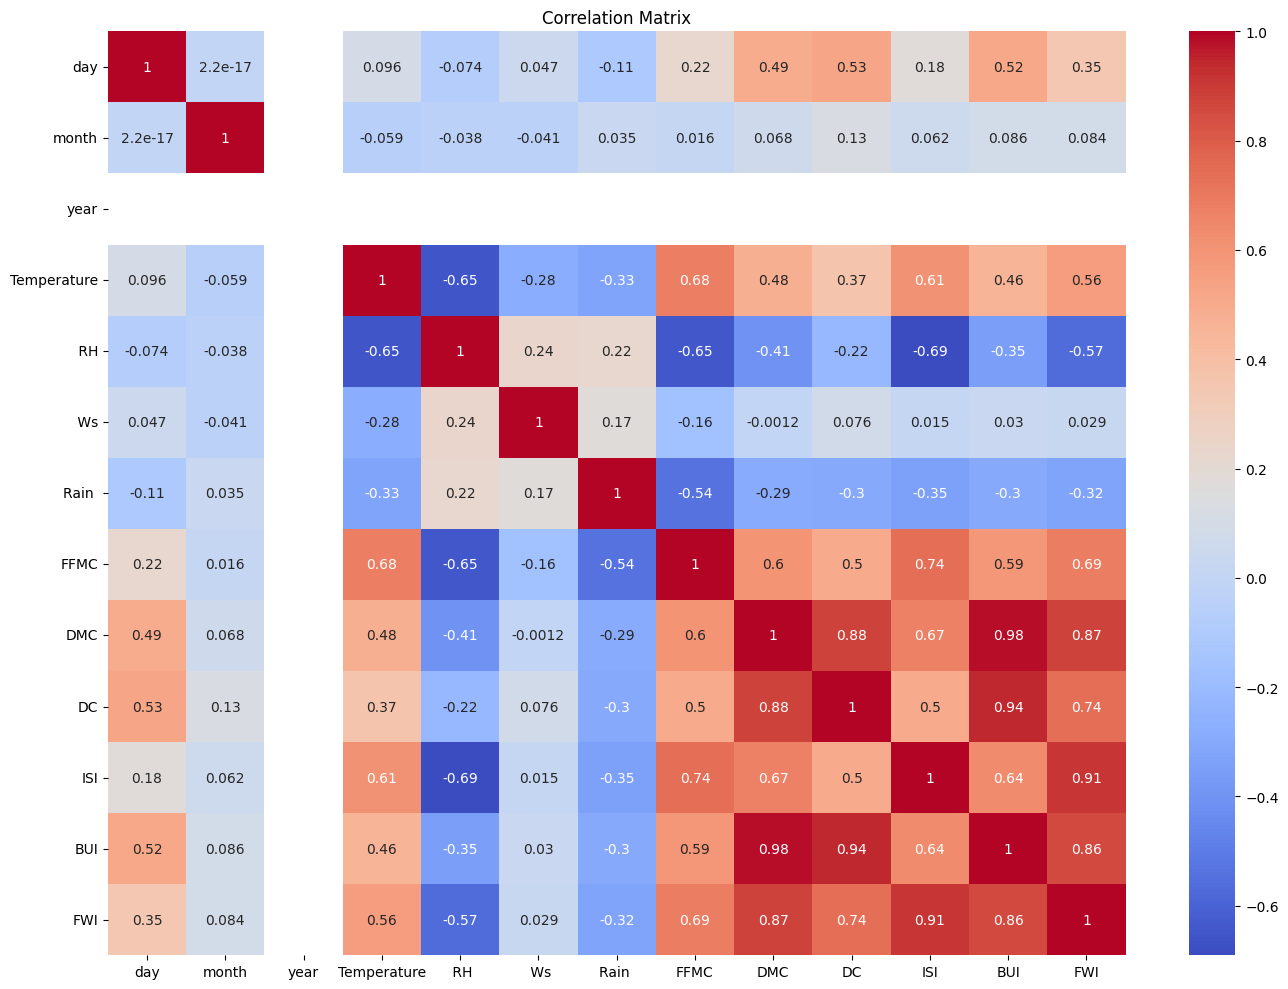

In [17]:
plt.figure(figsize=(14, 10))  
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()             
plt.show()

<Figure size 1200x1200 with 0 Axes>

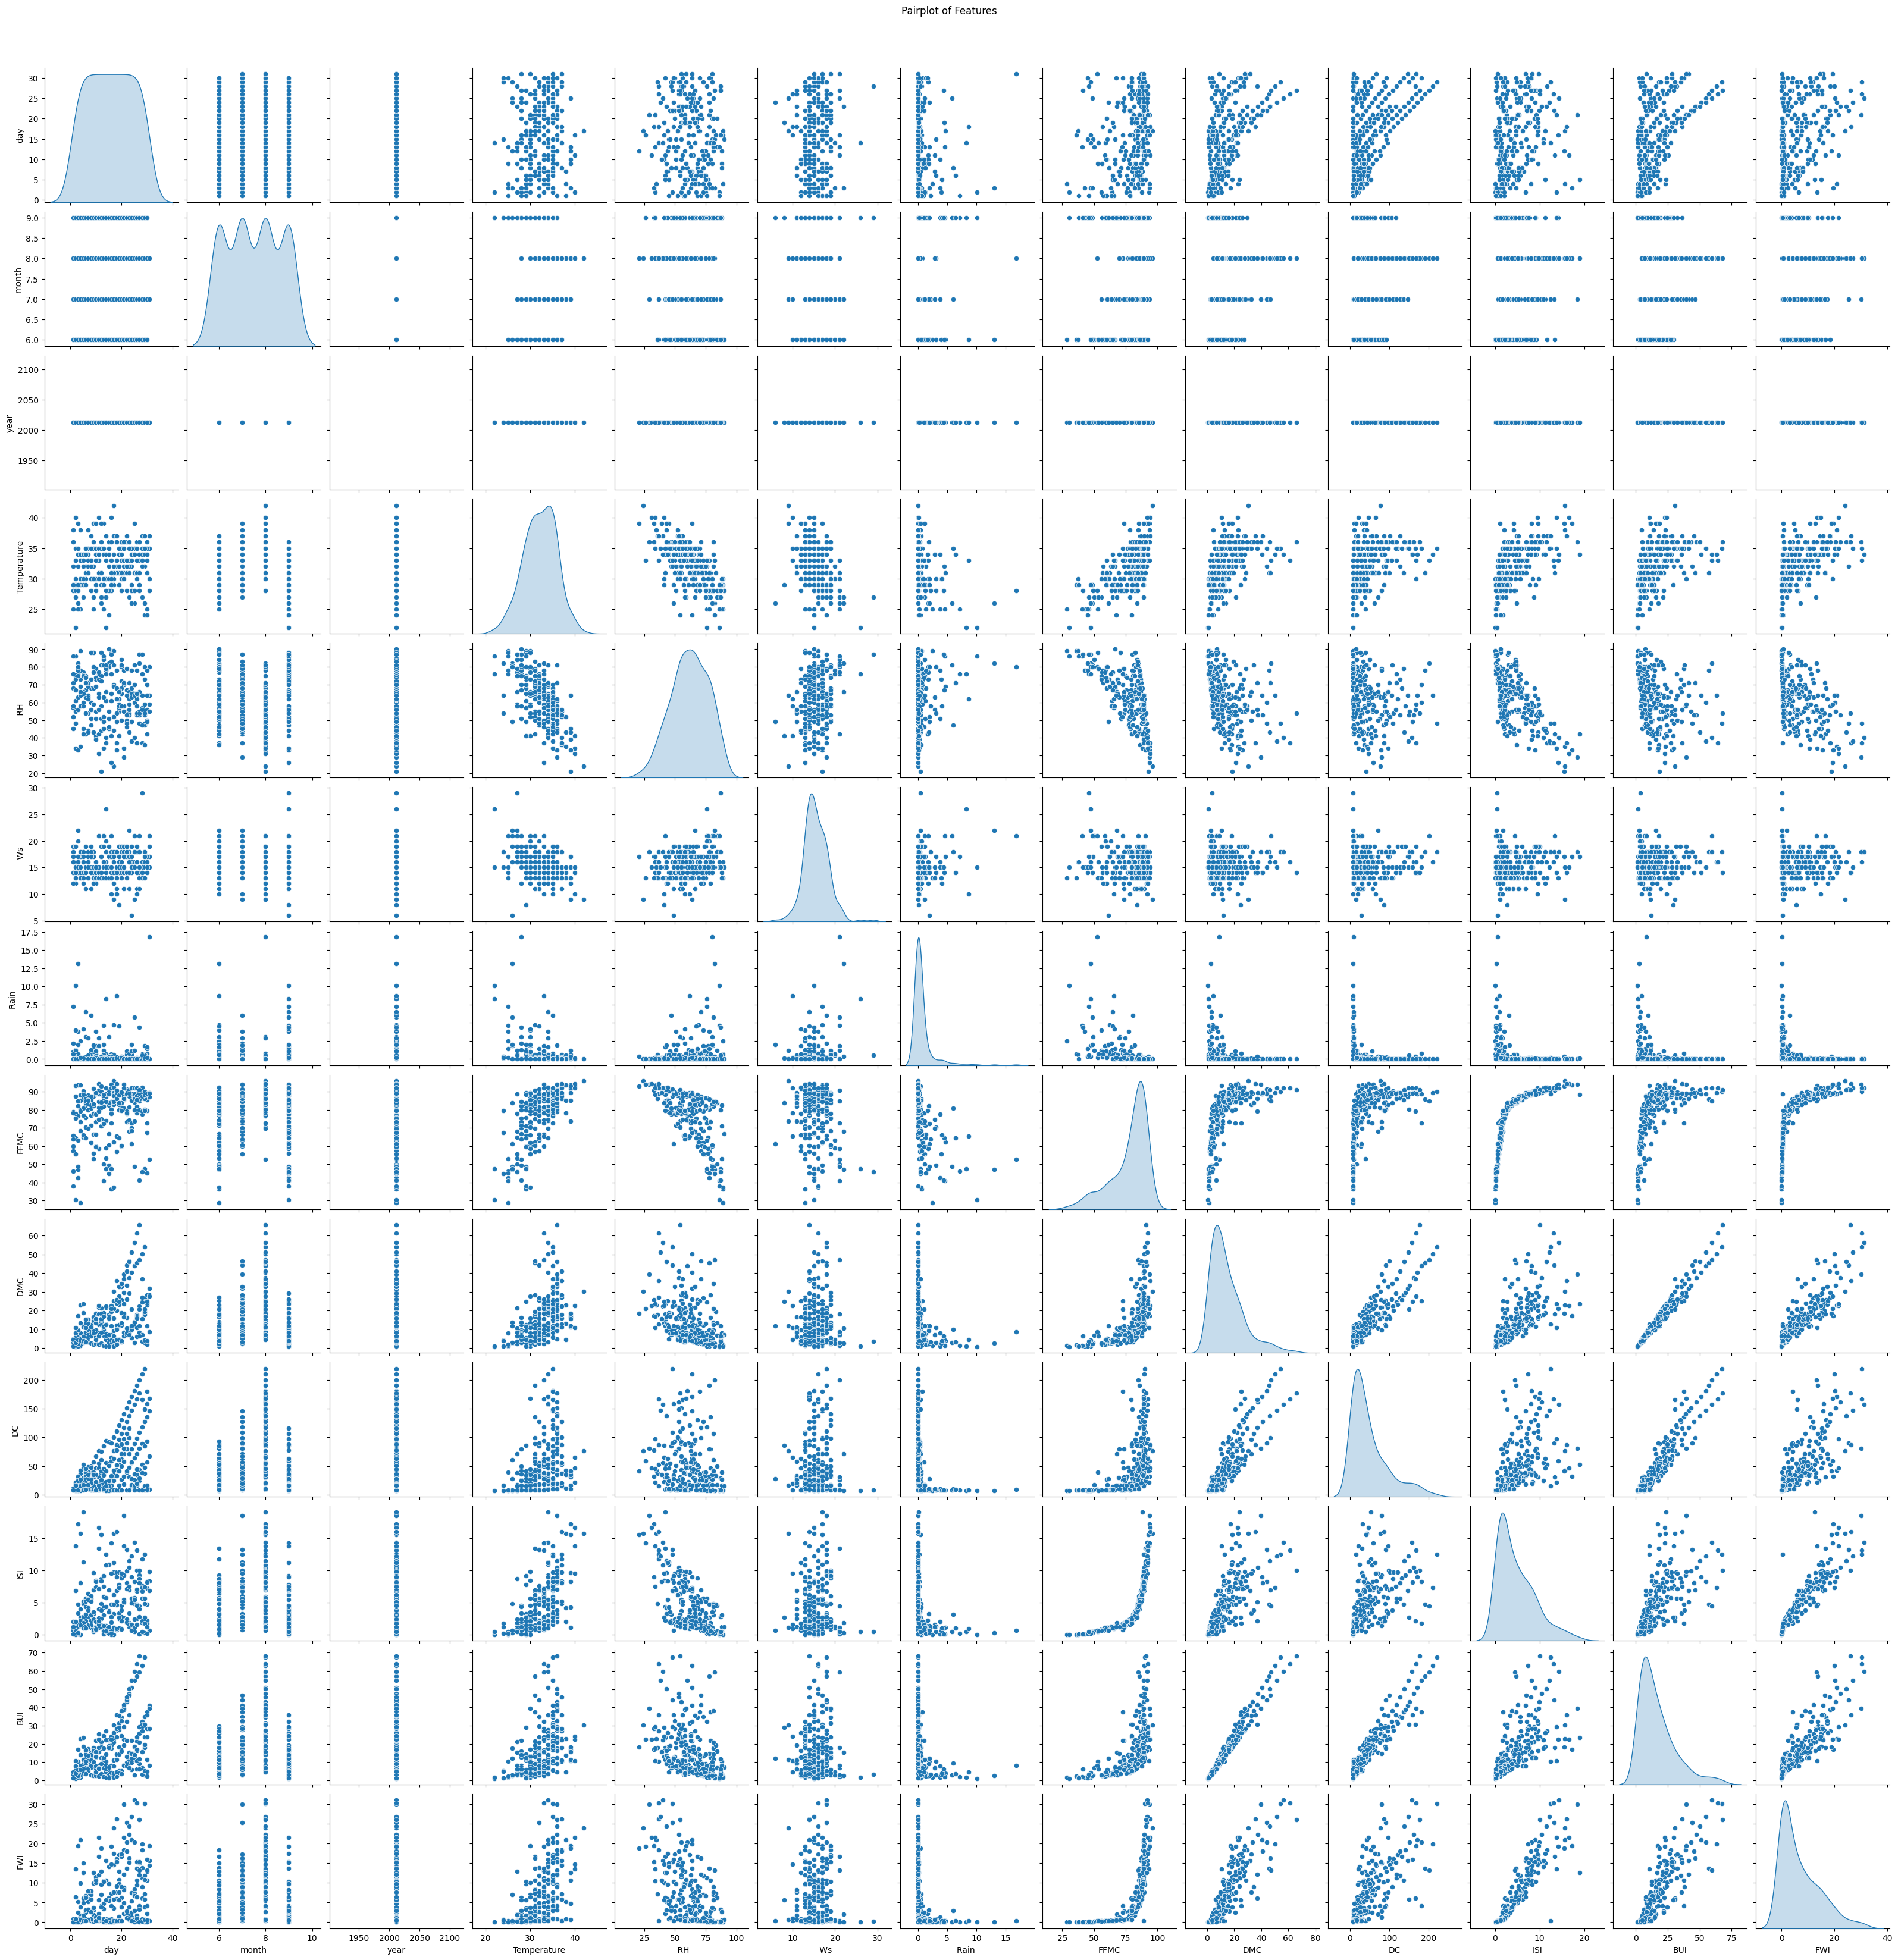

In [21]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind='kde')  # data = your dataframe
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [ ]:
# Encoding Categorical Variables

if "Region" in data.columns:
    le = LabelEncoder()
    data["Region"] = le.fit_transform(data["Region"])


In [53]:
data.to_csv("cleaned_FWI_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
